In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns

from sklearn.preprocessing import StandardScaler

## Data Exploration


In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.duplicated().sum()

0

## Data Visualisation

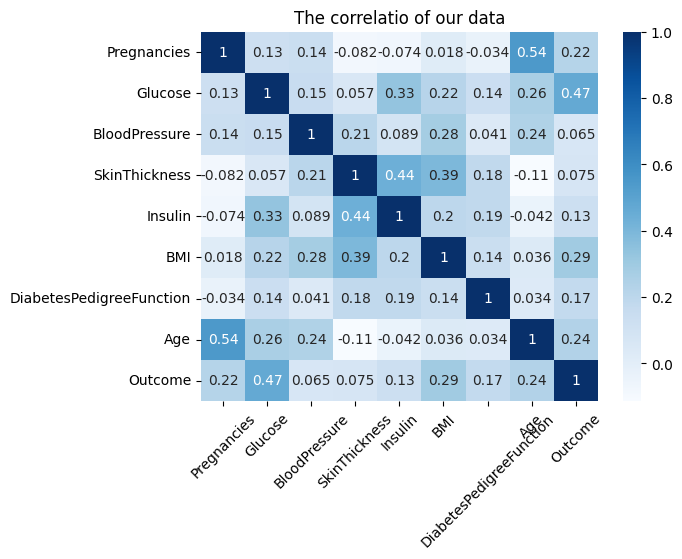

In [12]:
sns.heatmap(data.corr(),annot=True, cmap="Blues")
plt.title("The correlatio of our data")

plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Glucose', ylabel='Outcome'>

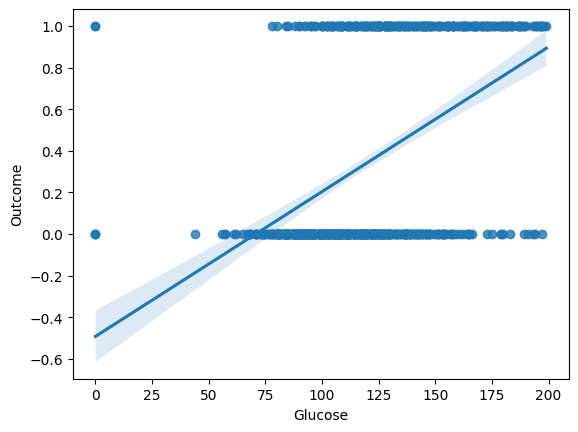

In [13]:
sns.regplot(x="Glucose", y="Outcome", data=data)

## Modeling

### Using unormalized values

In [14]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\admin\Desktop\My Projects\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
print("The training score", lr.score(X_train, y_train))
print("The testing score", lr.score(X_test, y_test))

The training score 0.7829861111111112
The testing score 0.75


### Using normalized values

In [19]:
stand = StandardScaler()

In [20]:
X_train_stand =  stand.fit_transform(X_train)
X_test_stand = stand.transform(X_test)

In [21]:
lr_stand = LogisticRegression()
lr_stand.fit(X_train_stand, y_train)

LogisticRegression()

In [22]:
print("The training score using normalized values", lr_stand.score(X_train_stand, y_train))
print("The testing score using normalized values", lr_stand.score(X_test_stand, y_test))

The training score using normalized values 0.7847222222222222
The testing score using normalized values 0.7604166666666666
